# Pricer Europen Call Option with Monte Carlo Processes 

Under BS the price of the underlying follows a geometric Brownian motion : dSt​=rSt​dt+σSt​dWt​

Where the solution is : ST​=S0​exp((r−21​σ2)T+σT​Z) 

- ST refers to the price of the underlying 

- S0 : spot price

- r : risk free rate

- T : time to maturity

- Z follows a standard normal distribution)

- σ : volatility of the underlying 

# Calculation of the underlying's price

In [21]:
import numpy as np

def ST(SO, r, sigma, T, N):
    Z =  np.random.normal(0, 1, N)
    drift = (r-(0.5*sigma**2))*T
    diffusion = sigma*(np.sqrt(T))*Z
    ST = SO*np.exp(drift + diffusion)
    return ST

# Calculation of the payoff of an European call


In [23]:
def payoff_call(ST,K):
    payoff = np.maximum(ST-K,0)
    return ("payoff_call =",payoff)

# Price option

In [42]:
# price underlying
def ST(S0, r, sigma, T, N):
    Z = np.random.normal(0, 1, N)
    drift = (r - 0.5 * sigma**2) * T
    diffusion = sigma * np.sqrt(T) * Z
    ST_values = S0 * np.exp(drift + diffusion)
    return ST_values

In [43]:
# payoff call
def payoff_call(ST, K):
    return np.maximum(ST - K, 0)

In [44]:
# price option
def price_option(S0, K, r, sigma, T, N):
    ST_call = ST(S0, r, sigma, T, N)
    payoffs = payoff_call(ST_call, K)
    price = np.exp(-r*T) * np.mean(payoffs)
    return price

# Choice of inputs

In [55]:

K = float(input("strike price"))
SO = float(input("Spot price: "))
sigma = float(input("Volatility: "))
T = float(input("Time to maturity: "))
N = int(input("Number of simulations: "))
r = float(input("Risk-free rate: "))
currency = input("currency")

print ("the price of an European call in",T,"years, with a strike =", K,"is",price_option(SO, K, r, sigma, T, N),currency)

strike price 40
Spot price:  38
Volatility:  0.12
Time to maturity:  2
Number of simulations:  20
Risk-free rate:  0.02
currency euro


the price of an European call in 2.0 years, with a strike = 40.0 is 3.0013397006958966 euro


# plot simulations

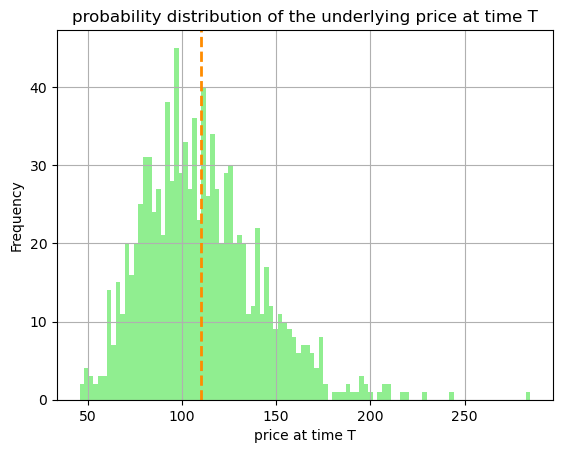

In [63]:
import matplotlib.pyplot as plt
# plot the distribution of ST

#example

ST_example = ST(100,0.05,0.2,2,1000)

plt.hist(ST_example, bins=100, color='lightgreen', alpha=1)
plt.axvline(np.mean(ST_example),color='darkorange',linestyle='dashed',linewidth=2 )
plt.xlabel("price at time T",size = 10)
plt.ylabel("Frequency",size =10)
plt.title("Probability distribution of the underlying price at time T",size = 12)
plt.grid(True)
plt.show()

# Plot the paths for payoffs

In [64]:
def simulate_paths(S0, r, sigma, T, M, N):
    dt = T / M
    Z = np.random.normal(0, 1, (N, M))
    increments = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    
    # cumul of increments
    log_paths = np.cumsum(increments, axis=1)
    
    # add S0
    S_paths = S0 * np.exp(log_paths)
    S_paths = np.hstack((np.full((N, 1), S0), S_paths))
    return S_paths

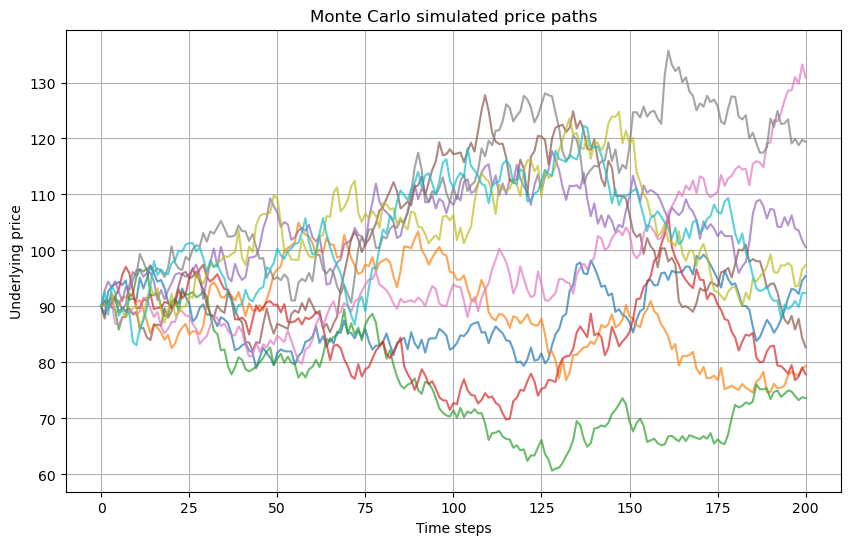

In [89]:
#example
M =200
N=10000

paths = simulate_paths(90, 0.05, 0.2, 2, M, N)

plt.figure(figsize=(10,6))

for i in range(10):
    plt.plot(paths[i], alpha=0.7)

plt.title("Monte Carlo simulated price paths")
plt.xlabel("Time steps")
plt.ylabel("Underlying price")
plt.grid(True)
plt.show()

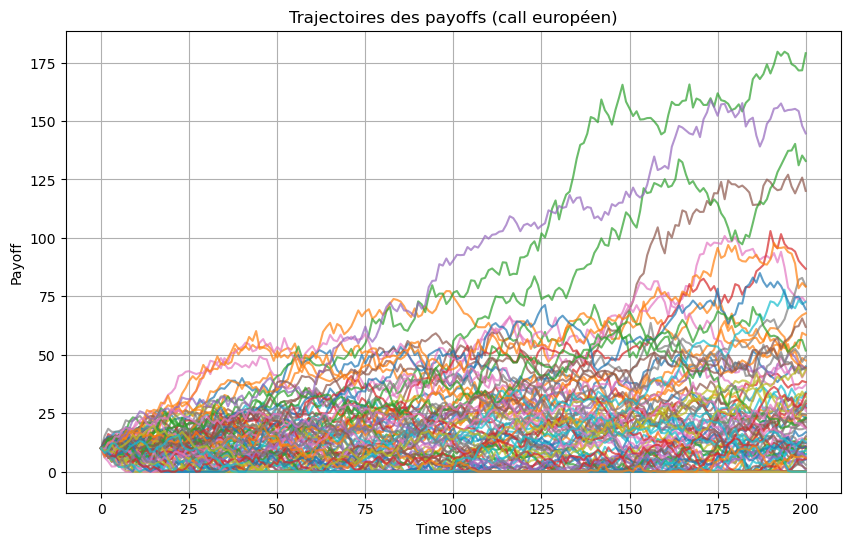

In [93]:
M =200
N=10000
K = 80
paths = simulate_paths(90, 0.05, 0.2, 2, M, N)


def payoff_trajectory(paths, K):
        return np.maximum(paths - K, 0)
    

payoff_paths_call = payoff_trajectory(paths, K)

plt.figure(figsize=(10,6))
for i in range(100):
    plt.plot(payoff_paths_call[i], alpha=0.7)
plt.title("Trajectoires des payoffs (call européen)")
plt.xlabel("Time steps")
plt.ylabel("Payoff")
plt.grid(True)
plt.show()

In [ ]:
# option price is equal to the mean of the payoffs * e**-rt  ((moyenne des payoffs simules) actuatualisee)

# Confidence intervall 95%

In [85]:
#example (MC -> Monte Carlo)

def price_option_MC(S0, K, r, sigma, T, N):
    Z = np.random.normal(0, 1, N)
    ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    payoffs = np.maximum(ST - K, 0)
    price = np.exp(-r*T) * np.mean(payoffs)
    
    sigma_payoff = np.std(payoffs)
    SE = np.exp(-r*T) * sigma_payoff / np.sqrt(N)

#bounds of the confidence interval
    IC_low  = price - 1.96 * SE
    IC_high = price + 1.96 * SE

    print ("price=",round(price,4),"SE=",round(SE,4), "confidence interval=",(round(IC_low,4), round(IC_high,4)))

In [86]:
#example
price_option_MC(100, 90, 0.05, 0.2, 2, 1000)

price= 22.6829 SE= 0.7707 confidence interval= (np.float64(21.1724), np.float64(24.1933))


# Comparison BS model

Acoording to BS model 

- C=S0​N(d1​)−Ke−rTN(d2​)

with : 

- d1​=(ln(S0​/K)+(r+0.5σ^2)T)/(σ*sqrt(T))

- d2​=d1​−σ*sqrt(T)

In [ ]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S0, K, r, sigma, T):
    d1 = (np.log(S0/K) + (r + 0.5*sigma*sigma)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    C = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return C

In [ ]:
# if the price from BS is in the confidence interval, this validates our simulation